# Video Labeling
Since this repo mainly involves running of python scripts, we did not incorporate them into a comprehensive jupyter notebook and instead only displayed the terminal commands used to invoke each step, resulting in a unsupervised approach to video frames labeling and grouping.

1st step: feature extraction with the I3D model (Those for demonstration purpose)<br>
The I3D model is used to extract the features for every 1.5 seconds of video while saving the median image of the 1.5 seconds of video as a visual representation.

In [ ]:
python3 VideoBERT/VideoBERT/I3D/batch_extract.py -h
usage: batch_extract.py [-h] -f FILE_LIST_PATH -r ROOT_VIDEO_PATH -s FEATURES_SAVE_PATH -i IMGS_SAVE_PATH

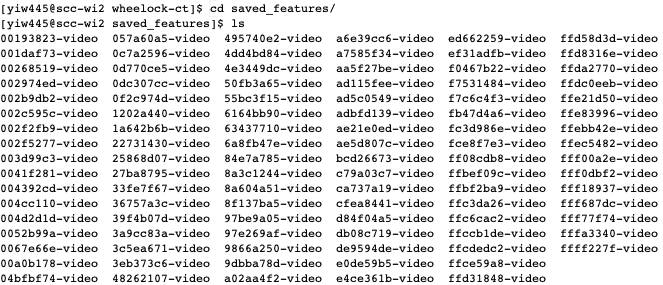 <br>
those are the saved features for each video that we had.


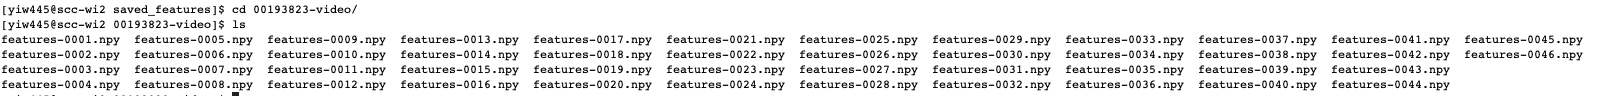 <br>
for each video we have saved features as .npy file 

2nd step: Hierarchical Minibatch K-means<br>
To find the centroids for the feature vectors, minibatch k-means is used hierarchically to save time and memory. After this, the nearest feature vector for each centroid is found, and the corresponding image is chosen to represent tht centroid. 

In [ ]:
python3 VideoBERT/VideoBERT/I3D/minibatch_hkmeans.py -h 
usage: minibatch_hkmeans.py [-h] -r ROOT_FEATURE_PATH -p FEATURES_PREFIX [-b BATCH_SIZE] -s SAVE_DIR -c CENTROID_DIR

After doing K-means, one image representing each centroid are found so that videos can be represented visually during inference.

In [ ]:
python3 VideoBERT/VideoBERT/data/centroid_to_img.py -h 
usage: centroid_to_img.py [-h] -f ROOT_FEATURES -i ROOT_IMGS -c CENTROID_FILE -s SAVE_FILE

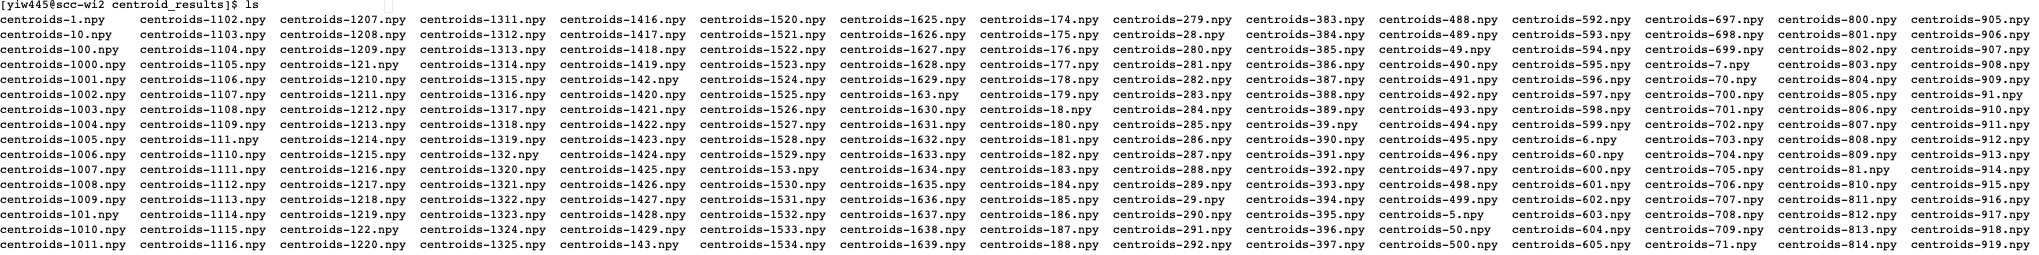 <br>
That is a demonstration of saved centroids after we apply k-means on saved features that we got from previous step. It is important for us to proceed next step since it will use for classify different frames base on the latent variables behind each frame.


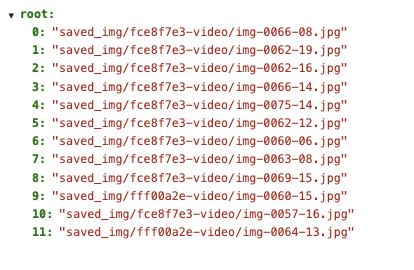 <br>
we save the json file to save the centroid to image dictionary in which is the image representing each centroid needs to be found to display the video during inference.

for example, <br>
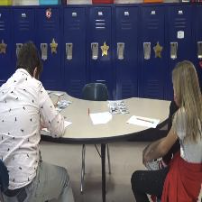 <br>
that represent 0:"saved_img/fce8f7e3-video/img-0066-08.jpg" <br>
for right now this is still abstract and high level, so human still hard to interpret the meaning why this the centroid

3rd step: Label and group data<br>
Using the centroids, videos are tokenized and text captions are punctuated. Using the timestamps for each caption, video ids are extracted and paired with the text captions in the training data file.

In [ ]:
 python3 VideoBERT/VideoBERT/data/label_data.py -f saved_features/ -c centroid_results/centroids-1728.npy -s labelled_data

The output is a json file that contains all saved labelled data for each video. 

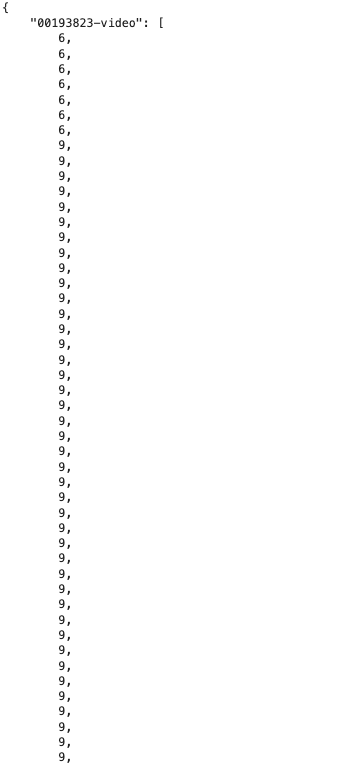

For example, for each video, it labelled each frame to different clusters from 0 to 11. It is based on algorthims that find the simlairty and based on our pre-defined number of unique clusters.

After that the following file can be run to both punctuate text and group the text with the corresponding video. This uses the Punctuator module, which requires a .pcl model file to punctuate the data. Also we use the captions generated from the other task.

In [ ]:
python3 VideoBERT/VideoBERT/data/punctuate_text.py -h 
usage: punctuate_text.py [-h] -c CAPTIONS_PATH -p PUNCTUATOR_MODEL -l LABELLED_DATA -f ROOT_FEATURES -s SAVE_PATH

From the original repo the next steps are training a BERT model that is capable of categorizing frames from unseen clips. Due to time and computational resource limits we were unable to train such a model. Hence the progress on this track is halted.